In [1]:
%matplotlib inline

import itertools

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits

# for exclusion region
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.patches as mpatches

In [16]:
from auction import BelloniAuctionApproximation as Approx
from ebm import ExclusiveBuyerMechanismApproximation as EBM

In [35]:
GRAPHPATH_ROOT = '/Users/jamesmichelson/github/phd/ch_auctions_simulations/images/'

In [3]:
def allocation(approx, fname=None):
    
    # TODO handle randomizations! 

    ### data processing code

    # assert approx.n_buyers == 1, "This only works for N=1"
    # assert len(approx.V) == 2, "This only works for K=2"

    eps = 1e-6

    try:
        x, y = np.round(approx.V_T_list[0], 4), np.round(approx.V_T_list[1], 4)
        T = approx.T
    except AttributeError:
        x, y = np.round(approx.Xj_ranges[0], 4), np.round(approx.Xj_ranges[1], 4)
        if approx.T < 1:
            T = int(approx.X[0][1] * ebm.T) - int(approx.X[0][0] * ebm.T) 
        else:
            T = len(approx.Xj_ranges[0])-1
        
    Q1 = np.round(np.array([Qs[0] for Qs in approx.Q]), 4)
    Q2 = np.round(np.array([Qs[1] for Qs in approx.Q]), 4)

    # make alloc
    Q1alloc = (Q1 > eps).astype('int').reshape((T+1,T+1))
    Q2alloc = (Q2 > eps).astype('int').reshape((T+1,T+1))
    zeroalloc = (Q1alloc + Q2alloc == 0).astype('int')

    # fill Q1 alloc
    ixs = [np.any(row) for row in Q1alloc]
    Q1alloc_fillbetween_x = x[ixs]
    Q1alloc_fillbetween_y1 = []
    for i, val in enumerate(ixs):
        if val:
            Q1alloc_fillbetween_y1.append(
                min(y[Q1alloc[i] > 0]))
    Q1alloc_fillbetween_y1 = np.array(Q1alloc_fillbetween_y1)
    Q1alloc_fillbetween_y2 = []
    for i, val in enumerate(ixs):
        if val:
            Q1alloc_fillbetween_y2.append(
                max(y[Q1alloc[i] > 0]))
    Q1alloc_fillbetween_y2 = np.array(Q1alloc_fillbetween_y2)

    # fill Q2 alloc
    ixs = [np.any(row) for row in Q2alloc]
    Q2alloc_fillbetween_x = x[ixs]
    Q2alloc_fillbetween_y1 = []
    for i, val in enumerate(ixs):
        if val:
            Q2alloc_fillbetween_y1.append(
                min(y[Q2alloc[i] > 0]))
    Q2alloc_fillbetween_y1 = np.array(Q2alloc_fillbetween_y1)
    Q2alloc_fillbetween_y2 = []
    for i, val in enumerate(ixs):
        if val:
            Q2alloc_fillbetween_y2.append(
                max(y[Q2alloc[i] > 0]))
    Q2alloc_fillbetween_y2 = np.array(Q2alloc_fillbetween_y2)

    # fill exclusion region
    ixs = [np.any(row) for row in zeroalloc]
    zeroalloc_fillbetween_x = x[ixs]
    zeroalloc_fillbetween_y1 = []
    for i, val in enumerate(ixs):
        if val:
            zeroalloc_fillbetween_y1.append(
                min(y[zeroalloc[i] > 0]))
    zeroalloc_fillbetween_y1 = np.array(zeroalloc_fillbetween_y1)
    zeroalloc_fillbetween_y2 = []
    for i, val in enumerate(ixs):
        if val:
            zeroalloc_fillbetween_y2.append(
                max(y[zeroalloc[i] > 0]))
    zeroalloc_fillbetween_y2 = np.array(zeroalloc_fillbetween_y2)

    ### graphing code
    
    try:
        V = approx.V
    except AttributeError:
        V = approx.X

    fig, ax = plt.subplots(figsize=(8,8))
    
    ax.title.set_text(r"Allocation $X_1 \times X_2=%s\times%s$ (T=%s)" % \
                      (V[0], V[1], approx.T))
    ax.title.set_size('large')
    ax.set(xlabel=r"$X_1$", ylabel=r"$X_2$")

    xaxis_ticks = np.round(x, 2)
    yaxis_ticks = np.round(y, 2)

    ax.set_xlim(xaxis_ticks[0], xaxis_ticks[-1])
    ax.set_xticks(xaxis_ticks)
    ax.set_xticklabels(xaxis_ticks, rotation=-45)

    ax.set_ylim(yaxis_ticks[0], yaxis_ticks[-1])
    ax.set_yticks(yaxis_ticks)

    q1_patch = mpatches.Patch(color='blue', label=r'$(1,0)$ allocation')
    q2_patch = mpatches.Patch(color='red', label=r'$(0,1)$ allocation')
    random_patch = mpatches.Patch(color='purple', label='Randomized allocation')
    zero_patch = mpatches.Patch(color='black', label='Exclusion region')
    ax.legend(handles=[q1_patch,q2_patch,random_patch,zero_patch], prop={'size': 12})

    plt.rcParams.update({'font.size': 10})
    plt.rc('legend', fontsize=10)

    plt.fill_between(
        x=Q1alloc_fillbetween_x,
        y1=Q1alloc_fillbetween_y1,
        y2=Q1alloc_fillbetween_y2,
        color='blue',
        alpha=.8)

    plt.fill_between(
        x=Q2alloc_fillbetween_x,
        y1=Q2alloc_fillbetween_y1,
        y2=Q2alloc_fillbetween_y2,
        color='red',
        alpha=.7)

    plt.fill_between(
        x=zeroalloc_fillbetween_x,
        y1=zeroalloc_fillbetween_y1,
        y2=zeroalloc_fillbetween_y2,
        color='black',
        alpha=.8)

    if fname:
        plt.savefig(fname,bbox_inches="tight")
    plt.show()

In [212]:
def alloc3d(approx, Q1only=False, fname=None):
    
    try:
        X = approx.V
        N = approx.n_buyers
        J = approx.n_grades
        X_ = approx.V_T_list[0]
        Y_ = approx.V_T_list[1]
        is_ebm = False
    except AttributeError:
        X = approx.X
        N = approx.N
        J = approx.J
        X_ = approx.Xj_ranges[0]
        Y_ = approx.Xj_ranges[1]
        is_ebm = True
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))

    n_ticks = 11
    xticks = np.round(np.linspace(X[0][0], X[0][1], n_ticks),4)
    yticks = np.round(np.linspace(X[1][0], X[1][1], n_ticks),4)
    
    if is_ebm:
        Q1 = np.round([q[0] for q in approx.Q],4).reshape((approx.T+1,approx.T+1))
        Q2 = np.round([q[1] for q in approx.Q],4).reshape((approx.T+1,approx.T+1))
    else:
        Q1 = np.round([q[0] for q in approx.Q],4).reshape((approx.T+1,approx.T+1))
        Q2 = np.round([q[1] for q in approx.Q],4).reshape((approx.T+1,approx.T+1)) 
    # Q1Q2 = Q1+Q2


    X_, Y_ = np.meshgrid(X_, Y_)
    if Q1only:
        Z = Q1.T
    else:
        Z = (Q1+Q2).T

    # ax.plot_surface(X, Y, Z, color='grey') #cmap to make it easier to see ? 

    surf = ax.plot_surface(X_, Y_, Z, cmap='viridis')

    ax.title.set_text(r"$N=%s$, $dim(X)=%s$" % (N, J))
    ax.title.set_size('x-large')

    ax.invert_xaxis()
    ax.set_xlabel(r"$X_1$", size='x-large',  labelpad=10)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, va='top') 

    ax.set_ylabel(r"$X_2$", size='x-large',  labelpad=10)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, ha='left', va='bottom')

    ax.set_zlim(0, 1)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r"$Q_1 + Q_2$", rotation=90, size='x-large', labelpad=10)
    ax.zaxis.set_major_formatter('{x:.01f}')
    
    ax.view_init(azim=-35, elev=30)

    # fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.rcParams.update({'font.size': 16})
  
    if fname:
        plt.savefig(fname,bbox_inches="tight")
    plt.show()

In [12]:
old5 = Approx.from_file('/Users/jamesmichelson/github/phd/ch_auctions_simulations/ebm_code/artefacts/uniform_01_N2_T5.pkl')
old10 = Approx.from_file('/Users/jamesmichelson/github/phd/ch_auctions_simulations/ebm_code/artefacts/uniform_01_N2_T10.pkl')
old15  = Approx.from_file('/Users/jamesmichelson/github/phd/ch_auctions_simulations/ebm_code/artefacts/uniform_01_N2_T15.pkl')
old20 = Approx.from_file('/Users/jamesmichelson/github/phd/ch_auctions_simulations/ebm_code/artefacts/uniform_01_N2_T20.pkl')

In [207]:
print(np.round(old5.opt,4))
print(np.round(old10.opt,4))
print(np.round(old15.opt,4))
print(np.round(old20.opt,4))

0.681
0.6383
0.6217
0.6129


In [ ]:
# note exclusion region is the same!

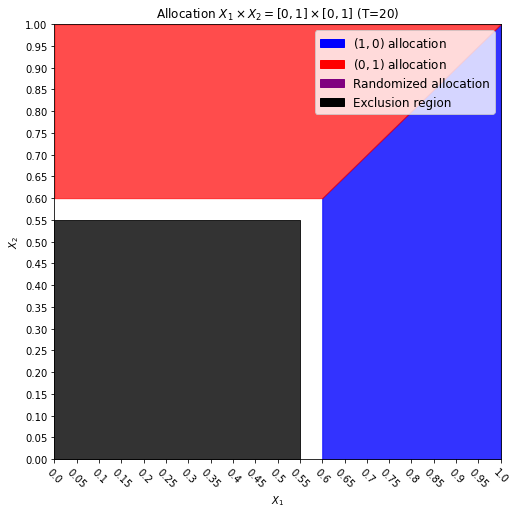

In [7]:
allocation(old20)

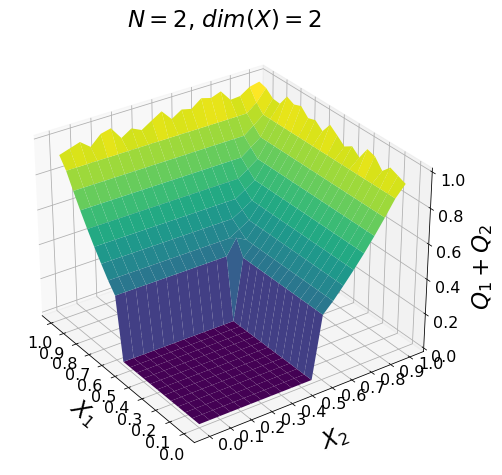

In [214]:
alloc3d(old20, Q1only=False, fname=GRAPHPATH_ROOT + 'uniform_01_N2_alloc.png')

# DO NOT RERUN: CAREFUL WITH AXIS LABES!

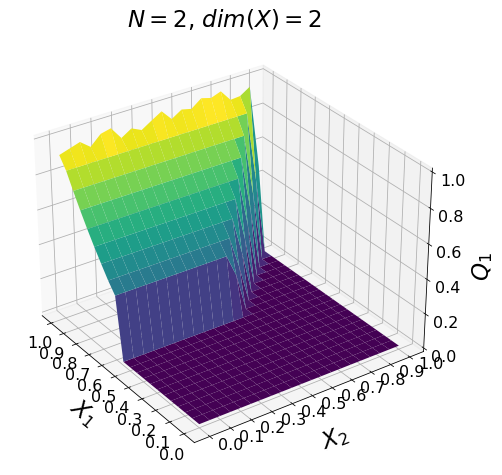

In [38]:
alloc3d(old20, True, GRAPHPATH_ROOT + 'uniform_01_N2_alloc_Q1.png')

In [48]:
def f(x):
    return 1

T = 20

ebm = EBM(
    N=2,
    X=[[0,1],[0,1]],
    c=[0,0],
    T=T,
    f=f)

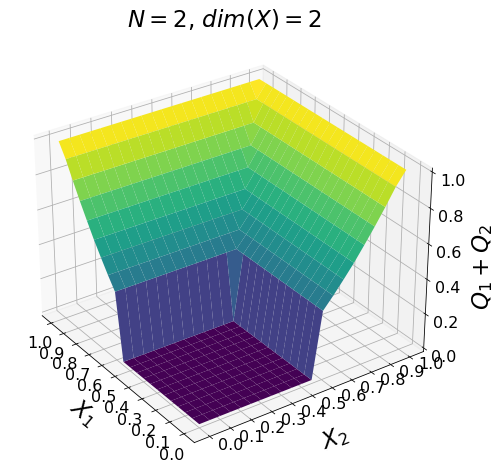

In [215]:
p = [.6,.6]
ebm.obj(p)

alloc3d(ebm, False, GRAPHPATH_ROOT + 'uniform_01_N2_alloc_ebm.png')

In [53]:
ebm.total # wrong! 

0.5517149999999965

In [66]:
Qs = ebm.Q

In [83]:
total = 0
for i, x in enumerate(ebm.X_iter):
    sum_j = 0
    for j in range(ebm.J):
        sum_j += Qs[i][j] * (x[j] - ebm.c[j])
    revenue = ebm.N * sum_j * ebm.ff(x) * \
        np.power(ebm.delta_1d, ebm.J) * ebm.numerical_adjustment(i)
    total += revenue
total
    

0.7739487499999937

In [77]:
old20.V

[[0, 1], [0, 1]]

In [81]:
old20.f_hat(p),np.power(ebm.delta_1d, ebm.J)

(0.002267573696145126, 0.0025000000000000005)

In [87]:
old20.f_hat([.2,.2])

0.002267573696145126

In [95]:
ebm.X_iter

[(0.0, 0.0),
 (0.0, 0.05),
 (0.0, 0.1),
 (0.0, 0.15000000000000002),
 (0.0, 0.2),
 (0.0, 0.25),
 (0.0, 0.30000000000000004),
 (0.0, 0.35000000000000003),
 (0.0, 0.4),
 (0.0, 0.45),
 (0.0, 0.5),
 (0.0, 0.55),
 (0.0, 0.6000000000000001),
 (0.0, 0.65),
 (0.0, 0.7000000000000001),
 (0.0, 0.75),
 (0.0, 0.8),
 (0.0, 0.8500000000000001),
 (0.0, 0.9),
 (0.0, 0.9500000000000001),
 (0.0, 1.0),
 (0.05, 0.0),
 (0.05, 0.05),
 (0.05, 0.1),
 (0.05, 0.15000000000000002),
 (0.05, 0.2),
 (0.05, 0.25),
 (0.05, 0.30000000000000004),
 (0.05, 0.35000000000000003),
 (0.05, 0.4),
 (0.05, 0.45),
 (0.05, 0.5),
 (0.05, 0.55),
 (0.05, 0.6000000000000001),
 (0.05, 0.65),
 (0.05, 0.7000000000000001),
 (0.05, 0.75),
 (0.05, 0.8),
 (0.05, 0.8500000000000001),
 (0.05, 0.9),
 (0.05, 0.9500000000000001),
 (0.05, 1.0),
 (0.1, 0.0),
 (0.1, 0.05),
 (0.1, 0.1),
 (0.1, 0.15000000000000002),
 (0.1, 0.2),
 (0.1, 0.25),
 (0.1, 0.30000000000000004),
 (0.1, 0.35000000000000003),
 (0.1, 0.4),
 (0.1, 0.45),
 (0.1, 0.5),
 (0.1, 0.55

In [134]:
def local(x,y,p):
    betas = [x-p[0],y-p[1]]
    beta_max = np.max(betas)
    beta_max_i = np.argmax(betas)
    if beta_max >= 0 - 1e-10:
        return [x,y][beta_max_i]
    return 0
    
def revenue_expost(ebm,p):
    total = 0
    for ix, x in enumerate(ebm.X_iter):
        total += local(*x,p) 
    return total * np.power(ebm.delta_1d, 2) # * ebm.numerical_adjustment(ix)

revenue_expost(ebm,p)

0.6090000000000002

In [209]:
# simulated second price auction
# p = [np.sqrt(1/3),np.sqrt(1/3)]
p = [.6,.6]
total = 0
for ix1, x1 in enumerate(ebm.X_iter):
    for ix2, x2 in enumerate(ebm.X_iter):
        
        beta1 = [x1[0]-p[0],x1[1]-p[1]]
        beta1_max = np.max(beta1)
        beta1_max_j = np.argmax(beta1)
        beta2 = [x2[0]-p[0],x2[1]-p[1]]
        beta2_max = np.max(beta2)
        beta2_max_j = np.argmax(beta2)  
        
        # find winner
        max_betas = [beta1_max, beta2_max]
        winner_i = np.argmax(max_betas)
        
        # pays 2nd highest beta
        if max_betas[winner_i] >= 0 - 1e-10:
            loser_i = (winner_i - 1) * -1
            loser_max_beta_j = max(max_betas[loser_i], 0)
            revenue = p[winner_i] + loser_max_beta_j
        else:
            revenue = 0
        
        # total += revenue * old20.f_hat[ix1] * old20.f_hat[ix2]  # .602
        total += revenue * np.power(ebm.delta_1d,4) * ebm.numerical_adjustment(ix1) * ebm.numerical_adjustment(ix2) # .596

print(total)

0.5960336718756268
